<a href="https://colab.research.google.com/github/BOSOEK/Machine_Learning_with_Book/blob/main/Deep_Learning_Chatbot_for_First_Time/Models/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스로 MNIST 숫자 이미지 분류 모델

Epoch 1/10
2100/2100 [==============================] - 5s 2ms/step - loss: 0.8040 - accuracy: 0.7745 - val_loss: 0.3870 - val_accuracy: 0.8896
Epoch 2/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3519 - accuracy: 0.8996 - val_loss: 0.3004 - val_accuracy: 0.9138
Epoch 3/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9163 - val_loss: 0.2801 - val_accuracy: 0.9196
Epoch 4/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9269 - val_loss: 0.2390 - val_accuracy: 0.9329
Epoch 5/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2359 - accuracy: 0.9322 - val_loss: 0.2234 - val_accuracy: 0.9369
Epoch 6/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2202 - accuracy: 0.9367 - val_loss: 0.2095 - val_accuracy: 0.9386
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2021 - accuracy: 0.9410 - val_loss: 0.1989 - val_accuracy:

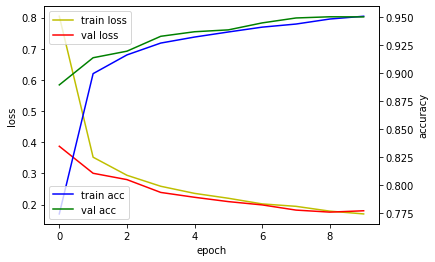

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# mnist 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test / 255.0   # 데이터 정규화

# tf.data로 데이터셋 섞고 배치
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7)   
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# 모델 평가
print('== 모델 평가 ==')
model.evaluate(x_test, y_test)

# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

### 학습된 딥러닝 모델 사용

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1771 - accuracy: 0.9476


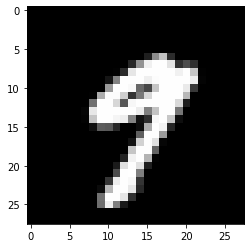

손글씨 이미지 예측값 :  [9]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from tensorflow.keras.models import load_model
# mnist 데이터 로드
_, (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test / 255.0   # 데이터 정규화

# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap='gray')
plt.show()

# 테스트셋의 20번째 이미지 클래스 분류
picks=[20]
predict = model.predict_classes(x_test[picks])
print('손글씨 이미지 예측값 : ', predict)